<h1>Table des matières<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-des-librairies" data-toc-modified-id="Import-des-librairies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import des librairies</a></span></li><li><span><a href="#Lecture-des-données" data-toc-modified-id="Lecture-des-données-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Lecture des données</a></span></li><li><span><a href="#Valeurs-aberrantes" data-toc-modified-id="Valeurs-aberrantes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Valeurs aberrantes</a></span></li><li><span><a href="#Kmeans" data-toc-modified-id="Kmeans-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Kmeans</a></span><ul class="toc-item"><li><span><a href="#Choisir-le-nombre-approprié-de-clusters" data-toc-modified-id="Choisir-le-nombre-approprié-de-clusters-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Choisir le nombre approprié de clusters</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Essai-avec-Yellowbrick" data-toc-modified-id="Essai-avec-Yellowbrick-4.1.0.1"><span class="toc-item-num">4.1.0.1&nbsp;&nbsp;</span>Essai avec Yellowbrick</a></span></li></ul></li><li><span><a href="#Coefficients-de-silhouette" data-toc-modified-id="Coefficients-de-silhouette-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Coefficients de silhouette</a></span><ul class="toc-item"><li><span><a href="#Essai-avec-Yellowbrick" data-toc-modified-id="Essai-avec-Yellowbrick-4.1.1.1"><span class="toc-item-num">4.1.1.1&nbsp;&nbsp;</span>Essai avec Yellowbrick</a></span></li></ul></li></ul></li><li><span><a href="#Distance-intercluster" data-toc-modified-id="Distance-intercluster-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Distance intercluster</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Visualisation-des-clusters" data-toc-modified-id="Visualisation-des-clusters-4.2.0.1"><span class="toc-item-num">4.2.0.1&nbsp;&nbsp;</span>Visualisation des clusters</a></span></li></ul></li><li><span><a href="#Davies-Bouldin" data-toc-modified-id="Davies-Bouldin-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Davies-Bouldin</a></span></li></ul></li></ul></li><li><span><a href="#Stabilité-des-clusters-dans-le-temps" data-toc-modified-id="Stabilité-des-clusters-dans-le-temps-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Stabilité des clusters dans le temps</a></span></li><li><span><a href="#KPrototypes" data-toc-modified-id="KPrototypes-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>KPrototypes</a></span></li><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>DBSCAN</a></span><ul class="toc-item"><li><span><a href="#Visualisation-avant-tuning" data-toc-modified-id="Visualisation-avant-tuning-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Visualisation avant tuning</a></span></li><li><span><a href="#Recherche-des-meilleurs-paramètres" data-toc-modified-id="Recherche-des-meilleurs-paramètres-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Recherche des meilleurs paramètres</a></span></li><li><span><a href="#Visualisation-après-tuning" data-toc-modified-id="Visualisation-après-tuning-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Visualisation après tuning</a></span></li></ul></li></ul></div>

## Import des librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn import decomposition
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import davies_bouldin_score
from sklearn.neighbors import NearestNeighbors

from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from kneed import KneeLocator

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.features.pcoords import parallel_coordinates

import time
from tqdm.auto import tqdm
tqdm.pandas()

## Lecture des données

In [2]:
rfm = pd.read_csv("data/rfm.csv")
rfm = rfm.set_index('customer_unique_id')
rfm

,recency,frequency,monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,115,1,1135.20
0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19
0000f46a3911fa3c0805444483337064,541,1,689.76
0000f6ccb0745a6a4b88665a16c9f078,325,1,174.48
0004aac84e0df4da2b147fca70cf8255,292,1,1181.34
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,451,1,20674.20
fffea47cd6d3cc0a88bd621562a9d061,266,1,84.58
ffff371b4d645b6ecea244b27531430a,572,1,112.46


## Valeurs aberrantes

In [3]:
rfm.describe()

,recency,frequency,monetary
count,93395.000000,93395.000000,93395.000000
mean,241.740618,1.033406,673.583621
std,153.161518,0.208236,1717.605791
min,0.000000,1.000000,0.000000
25%,118.000000,1.000000,77.110000
50%,222.000000,1.000000,189.160000
75%,351.000000,1.000000,554.900000
max,728.000000,15.000000,75716.300000


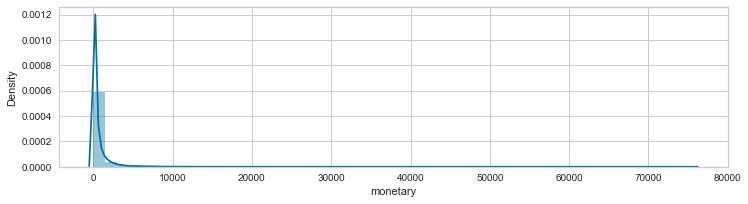

In [4]:
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 3); sns.distplot(rfm['monetary'])
plt.show()

In [5]:
Q1 = rfm[["monetary"]].quantile(0.25)
Q3 = rfm[["monetary"]].quantile(0.75)
EI = Q3 - Q1
EI

monetary    477.79
dtype: float64

In [6]:
outliers = (rfm[["monetary"]] < (Q1 - 1.5 * EI)) | \
           (rfm[["monetary"]] > (Q3 + 1.5 * EI))

rfm_with_outliers = rfm.copy()
rfm = rfm[outliers["monetary"] == False]
rfm.describe()

,recency,frequency,monetary
count,81850.000000,81850.000000,81850.000000
mean,240.757153,1.026756,265.002529
std,152.688575,0.175515,279.191683
min,0.000000,1.000000,0.000000
25%,118.000000,1.000000,68.972500
50%,221.000000,1.000000,149.010000
75%,349.000000,1.000000,358.320000
max,728.000000,7.000000,1271.520000


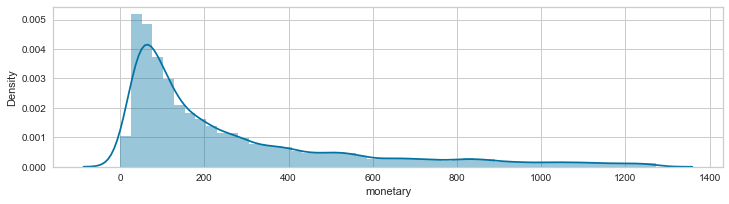

In [7]:
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 3); sns.distplot(rfm['monetary'])
plt.show()

In [8]:
df_rfm_sample = rfm.sample(10000, random_state=42)
rfm_with_outliers_sample = rfm_with_outliers.sample(
    10000, random_state=42)

La distribution de <code>monetary</code> est beaucoup mieux distribué après traitement. Comme précisé dans le notebook analyse, ces clients qui ont été supprimé peuvent être selectionnés et avoir un traitement spécifique.

## Kmeans

In [9]:
scaler = StandardScaler()

scaled_features = scaler.fit_transform(rfm)
scaled_samples = scaler.fit_transform(df_rfm_sample)

In [10]:
scaled_features[:5]

array([[-0.82362365, -0.15244514,  3.11686501],
       [-0.80397569, -0.15244514, -0.85179465],
       [ 1.96638603, -0.15244514,  1.52139226],
       [ 0.55173323, -0.15244514, -0.32423273],
       [ 0.33560572, -0.15244514,  3.28212882]])

In [11]:
kmeans_params = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

kmeans = KMeans(n_clusters=3, **kmeans_params)

In [12]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [13]:
# La valeur SSE la plus faible
kmeans.inertia_

113978.33154625229

In [14]:
# Emplacements finaux du centroïde
kmeans.cluster_centers_

array([[-0.10317291,  5.97004475,  0.58305592],
       [-0.71237591, -0.15244514, -0.0554712 ],
       [ 0.98683837, -0.15244514,  0.04097351]])

In [15]:
# Le nombre d'itérations nécessaires pour converger
kmeans.n_iter_

8

In [16]:
kmeans.labels_[:5]

array([1, 1, 2, 2, 2])

### Choisir le nombre approprié de clusters

In [17]:
# Une liste contient les valeurs SSE pour chaque k
sse = []
for k in tqdm(range(1, 11)):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

  0%|          | 0/10 [00:00<?, ?it/s]

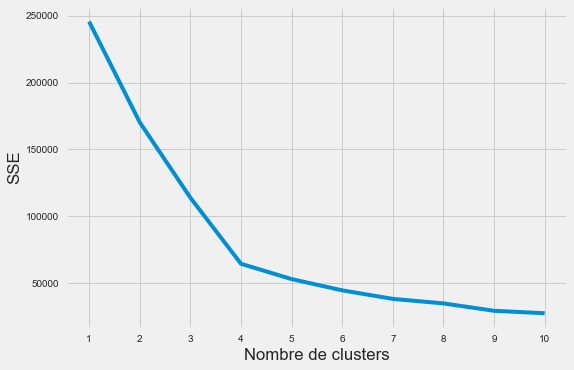

In [18]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Nombre de clusters")
plt.ylabel("SSE")
plt.show()

In [19]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

##### Essai avec Yellowbrick

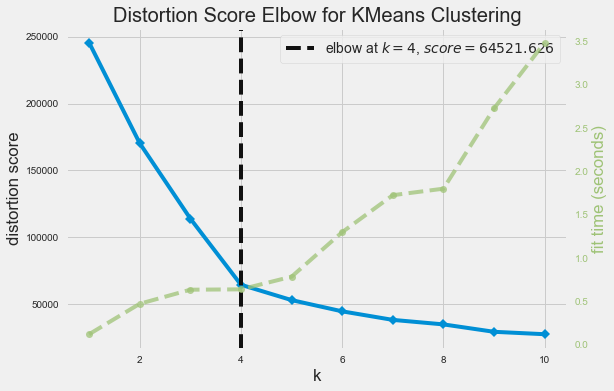

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
model = KMeans(**kmeans_params)
visualizer = KElbowVisualizer(model, k=(1, 11))
visualizer.fit(scaled_features)
visualizer.show()

#### Coefficients de silhouette

L'analyse des silhouettes peut être utilisée pour étudier la distance de séparation entre les clusters résultants. Le tracé de la silhouette affiche une mesure de la proximité de chaque point d'un cluster par rapport aux points des clusters voisins et fournit ainsi un moyen d'évaluer visuellement des paramètres tels que le nombre de clusters. Cette mesure est comprise entre [-1, 1].

La ligne rouge indique le score global de la silhouette. Tant que le tracé de la silhouette dépasse cette ligne, le cluster peut être jugé comme correct.

Des coefficients de silhouette (comme on appelle ces valeurs) proches de +1 indiquent que l'échantillon est très éloigné des clusters voisins. Une valeur de 0 indique que l'échantillon est sur ou très proche de la frontière de décision entre deux clusters voisins et des valeurs négatives indiquent que ces échantillons pourraient avoir été assignés au mauvais cluster.


Dans cette partie, l'analyse de silhouette est utilisée pour choisir une valeur optimale pour n_clusters.

In [21]:
# Une liste contient les coefficients de silhouette pour chaque k
silhouette_coefficients = []

# Notez que vous commencez à 2 clusters pour le coefficient de silhouette.
for k in tqdm(range(2, 10)):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(scaled_samples)
    score = silhouette_score(scaled_samples, kmeans.labels_)
    silhouette_coefficients.append(score)

  0%|          | 0/8 [00:00<?, ?it/s]

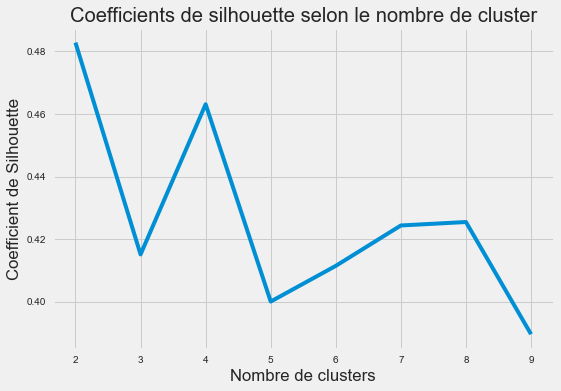

In [22]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 10), silhouette_coefficients)
plt.xticks(range(2, 10))
plt.xlabel("Nombre de clusters")
plt.ylabel("Coefficient de Silhouette")
plt.title("Coefficients de silhouette selon le nombre de cluster")
plt.show()

Les meilleurs score de silhouette s'obtiennent lorsque n_clusters vaut 2 et 4. Or, nous avons besoins d'analyser en détails chacun des clusters pour déterminer quel n_clusters est effectivement le plus cohérent.

##### Essai avec Yellowbrick

Analysons maintenant en détail le score de silhouette pour chaque cluster, pour chaque paramètre n_clusters.

Pour chaque point, son coefficient de silhouette est la différence entre la distance moyenne avec les points du même groupe que lui (cohésion) et la distance moyenne avec les points des autres groupes voisins (séparation). Si cette différence est négative, le point est en moyenne plus proche du groupe voisin que du sien : il est donc mal classé. À l'inverse, si cette différence est positive, le point est en moyenne plus proche de son groupe que du groupe voisin : il est donc bien classé.

  0%|          | 0/8 [00:00<?, ?it/s]

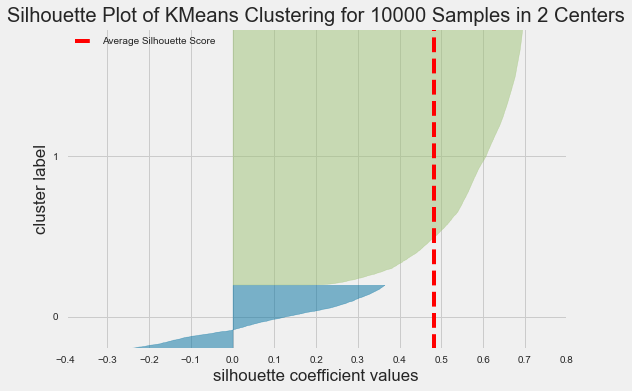

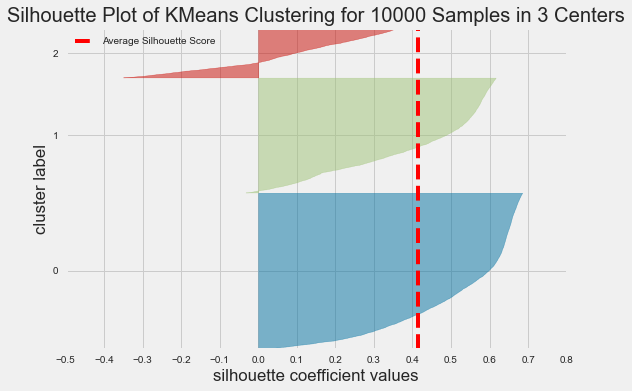

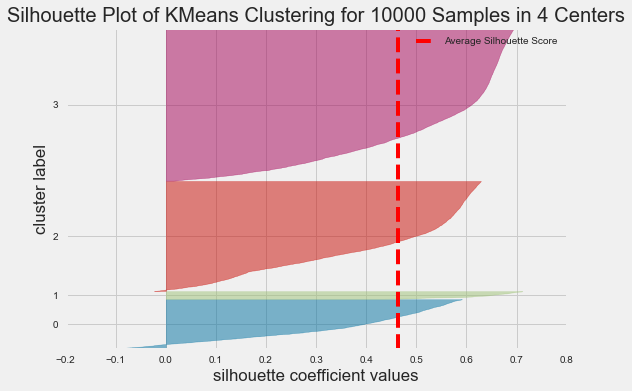

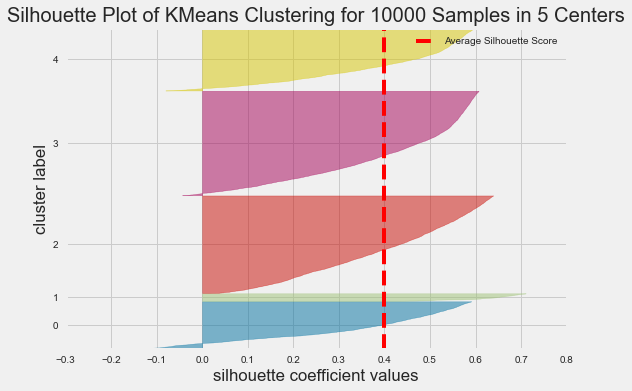

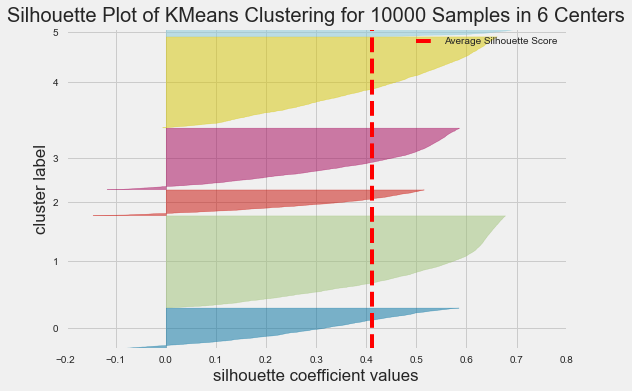

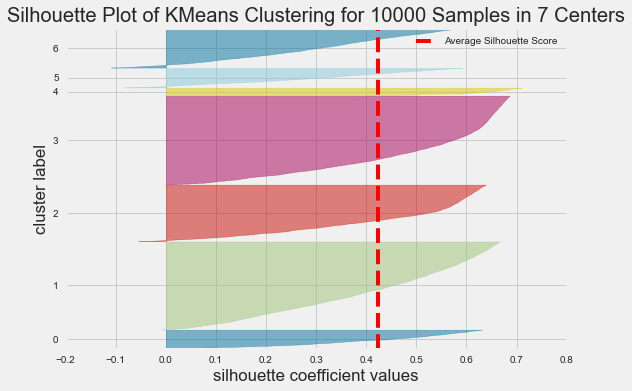

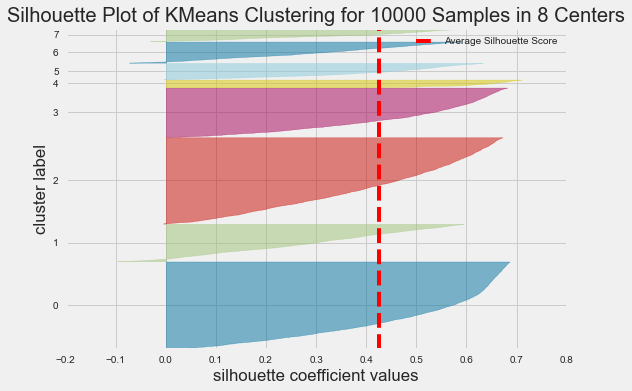

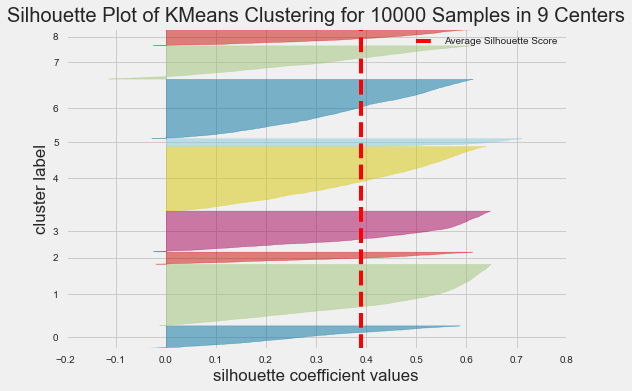

In [23]:
from yellowbrick.cluster import intercluster_distance
# Instanciation du modèle de clustering et du visualiseur

for n_cluster in tqdm(range(2, 10)):
    model = KMeans(n_cluster, **kmeans_params)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(scaled_samples)  # Adapter les données au visualiseur
    visualizer.show()  # afficher la silhouette

Les diagrammes de silhouette montrent que les valeurs de n_clusters de 2 et 3 sont un mauvais choix pour les données données données en raison de la présence de clusters avec des scores de silhouette inférieurs à la moyenne et également en raison des grandes fluctuations dans la taille des diagrammes de silhouette. L'analyse des silhouettes est plus positive lorsqu'il s'agit de choisir à partir de 4 clusters.


L'épaisseur du tracé de la silhouette permet également de visualiser la taille du cluster. Lorsque n_clusters est supérieur à 4, tous les tracés sont plus ou moins de la même épaisseur et donc de tailles similaires. Néanmoins, on observe des points ayant comme score de silhouette des scores en dessous de zéro. Pour rappel, des valeurs négatives indiquent que ces points pourraient avoir été assignés au mauvais cluster.

Avec le tout premier grahique "Coefficients de silhouette selon le nombre de cluster", on s'aperçoit que les deux meilleurs scores s'obtiennent lorsque n_clusters est égal à 2 ou 4. Or, lorsque n_clusters vaut 2, le cluster 0 est complètement défectueux car on obtient beaucoup de points qui ont des valeurs négatives. Les clusters 0 et 1 sont complètement disproportionnés.

La valeur de n_clusters quand n_clusters vaut 4 a l'air d'être le meilleur compromis.


Nous pouvons effectuer d'autres visualisation qui nous permettrons de trancher quel nombre de cluster serait le plus optimal.

### Distance intercluster

https://www.scikit-yb.org/en/latest/api/cluster/icdm.html

Les cartes de distance interclusters affichent la distance des centres de clusters, en 2 dimensions.

Ce qui attirera notre attention ici, c'est lorsque les clusters seront distinctement séparés les uns des autres.
Si trop de clusters se chevauchent entre eux, nous pourrons les éliminer.

Comme nous l'avons observer précédemment, lorsque n_clusters vaut 2 ou 3, le modèle n'est pas optimal. Nous pouvons donc commencer notre analyse à partir de n_clusters = 4.

  0%|          | 0/6 [00:00<?, ?it/s]

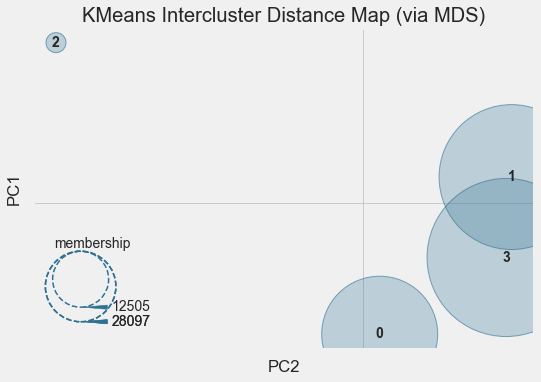

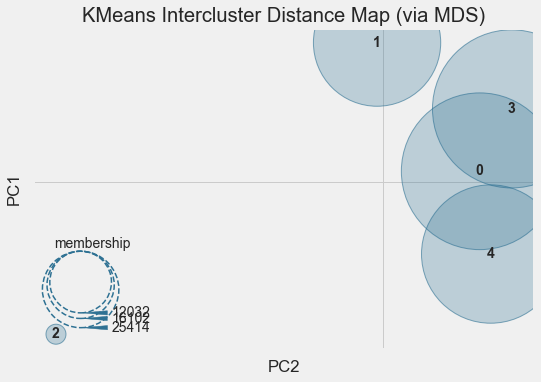

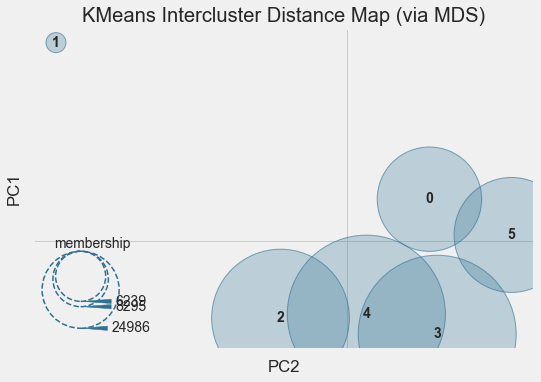

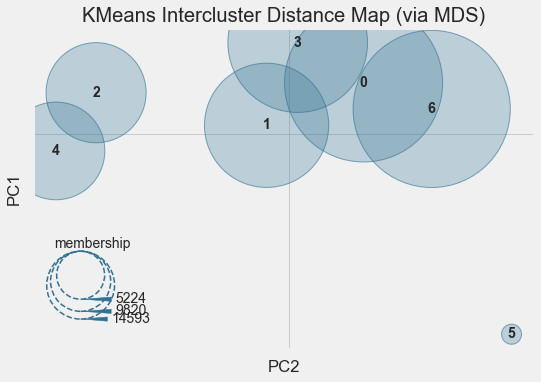

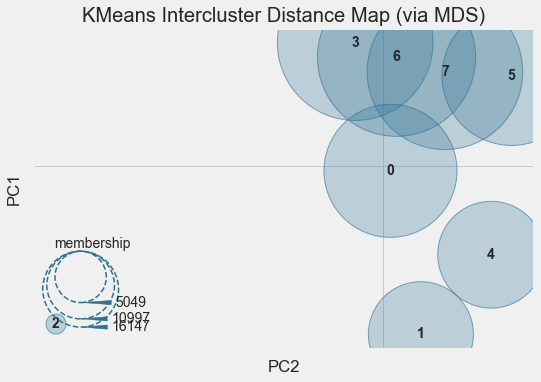

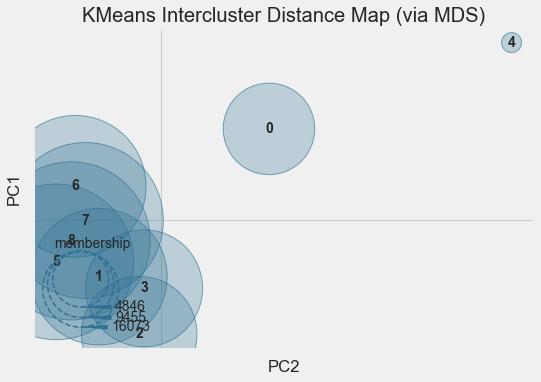

In [24]:
from yellowbrick.cluster import intercluster_distance
# Instanciation du modèle de clustering et du visualiseur

for n_cluster in tqdm(range(4, 10)):
    model = KMeans(n_cluster, **kmeans_params)
    intercluster_distance(model, scaled_features)

Pour chaque carte, on observe un cluster qui est très éloigné et qui est plus petit que les autres clusters. Ce cluster peut facilement s'expliquer : il représente les clients les plus rare, c-a-d les VIP, ceux qui achètent pour de grosses sommes (voir la distribution de "monetary" dans la partie "Valeurs aberrantes").

Le n_clusters pour lequel la carte semble le plus attractif, est le n_cluster qui vaut 4 car observe une distincte séparation entre les cluster et un très faible chevauchement entre les clusters.

Au_delà de n_cluster égal à 4, les clusters sont beaucoup trop rapprochés les uns des autres.

Cette analyse vient renforcer celles effectuées précédement, qui est que le n_clusters égal à 4 semble le plus adapté.

##### Visualisation des clusters

In [25]:
def pca_clusters(dataframe, algorithm, args, kwds):
    """
    Fonction permettant de générer une projection PCA de clusters

    Entrée :
    - dataframe - unscaled dataframe
    - algorithm - algorithme de clustering
    - args - arguments de l'algorithme, liste
    - kwds - paramètres de l'algorithme, dictionnaire

    Sortie :
    - Aucun (affiche une projection de point)
    """
    start_time = time.time()
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(dataframe)
    labels = algorithm(*args, **kwds).fit_predict(scaled_data)
    pca = decomposition.PCA(n_components=2).fit(scaled_data)
    X_projected = pca.transform(scaled_data)
    pca_df = pd.DataFrame(X_projected)
    pca_df['cluster'] = labels
    pca_df.columns = ['x1', 'x2', 'cluster']
    end_time = time.time()
    sns.scatterplot(data=pca_df,
                    x='x1',
                    y='x2',
                    hue='cluster',
                    legend="full",
                    alpha=0.7).set_title('Clusters trouvés par {}'.format(
        str(algorithm.__name__)))
    print(f"Le clustering a pris {round(end_time - start_time)}s")

Le clustering a pris 1s


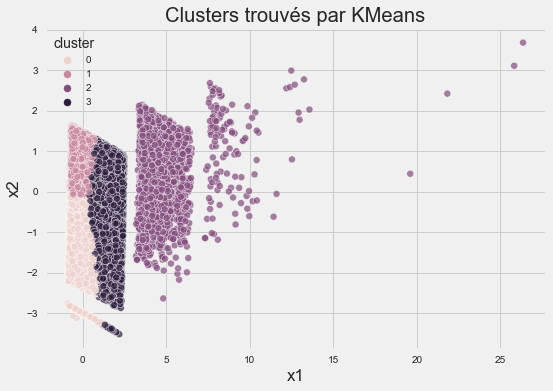

In [26]:
pca_df = pca_clusters(rfm, cluster.KMeans, (), {'n_clusters': 4})

En effectuant une visualisation par PCA des clusters, on observe également que les points de couleur ne sont pas mélangés et que les regroupements de points sont très homogènes.

#### Davies-Bouldin

L'indice de Davies-Bouldin est une mesure de qualité d'une partition d'un ensemble de données.

C'est la moyenne du rapport maximal entre la distance d'un point au centre de son groupe et la distance entre deux centres de groupes.

L'indice de Davies-Bouldin varie entre 0 (meilleure classification) et ${\textstyle +\infty }$ (pire classification).

In [27]:
davies_index = []

for k in tqdm(range(2, 11)):
    model = KMeans(n_clusters=k, **kmeans_params)
    model.fit(scaled_features)
    labels = model.labels_
    davies_index.append(davies_bouldin_score(rfm, labels))

  0%|          | 0/9 [00:00<?, ?it/s]

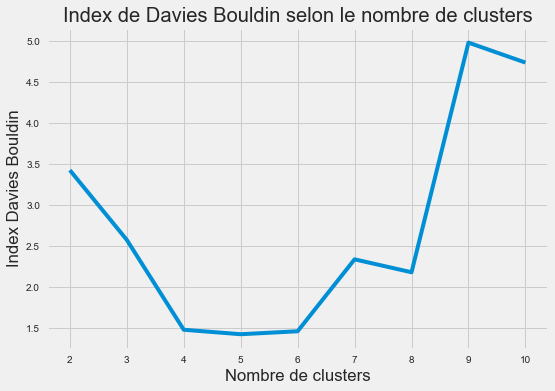

In [28]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), davies_index)
plt.xticks(range(2, 11))
plt.xlabel("Nombre de clusters")
plt.ylabel("Index Davies Bouldin")
plt.title("Index de Davies Bouldin selon le nombre de clusters")
plt.show()

Avec cette mesure, on obtient les meilleurs indices quand n_clusters se situe entre 4 et 6. n_clustes égal à 4 revient très souvent et semble être le paramètre à adopter pour notre cas.

## Stabilité des clusters dans le temps

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html

Les valeurs de sortie de l'ARI sont comprises entre -1 et 1. Un score proche de 0 indique des affectations aléatoires, et un score proche de 1 indique des clusters parfaitement étiquetés.

In [29]:
def kmean_time_stability(dataframe, recency_col, n_clusters, ari=True):
    """
    Affiche la stabilité dans le temps d'un modèle non supervisé.
    
    On prend comme référence une année. On prédit ensuite pour chaque
    mois de l'année suivante, l'étiquette, en prenant comme référence
    l'étiquette du cluster de l'année précédente.
    Une fois la prédiction faite, on peut appeler la fonction adjusted_rand_score()
    de scikit-learn, qui prend en paramètre la prédiction ainsi que le label.

    Entrée :
    - dataframe - unscaled dataframe
    - recency_col - str, la colonne récence
    - n_clusters - int, nombre de clusters
    - ari - bool, choix entre ARI ou AMI

    Sortie :
    - Liste de score
    """
    np.seterr(all='ignore')

    date_init = 365
    date_slipping = 0
    date_lim = date_init
    date_max = dataframe[recency_col].max()

    score = []
    
    # On prend la première année
    first_year = dataframe[dataframe[recency_col] <= date_init]
    first_year_scaled = StandardScaler().fit_transform(first_year)
    first_year_clustered = cluster.KMeans(n_clusters=n_clusters)
    first_year_clustered.fit(first_year_scaled)

    while date_lim < date_max:
    # À chaque iteration, on selectionne la dataframe correspondant à un mois précis
        add_next_month = dataframe[(dataframe[recency_col] >= date_slipping)
                                   & (dataframe[recency_col] <= date_lim)]
        add_next_month_scaled = StandardScaler().fit_transform(add_next_month)
        y_pred = first_year_clustered.predict(add_next_month_scaled)
        y_label = first_year_clustered.fit(add_next_month_scaled).labels_

        if ari == True:
            score.append(adjusted_rand_score(y_pred, y_label))
        else:
            score.append(adjusted_mutual_info_score(y_pred, y_label))

        date_lim += 30
        date_slipping += 30

    return score[::-1]

Text(0.5, 0.98, "Evolution de l'ARI")

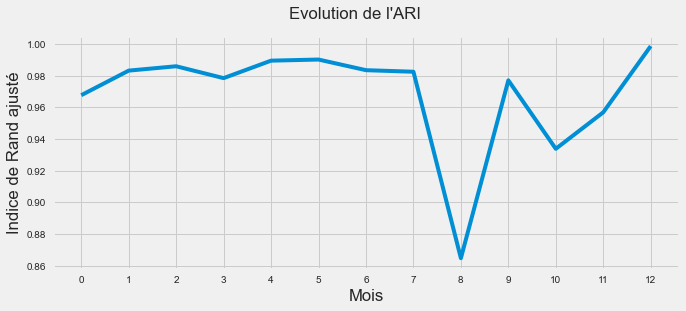

In [30]:
score_ari = kmean_time_stability(rfm, 'recency', 4, ari=True)
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(range(len(score_ari)), score_ari)
plt.xlabel("Mois")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.ylabel("Indice de Rand ajusté")
fig.suptitle("Evolution de l'ARI")

Le graphique indique une chute de la stabilité après le 7e mois. Si l’on se base dessus, nous pourrions proposer une maintenance du modèle à partir du 7em mois.

## KPrototypes

L'algorithme K-Means est l'une des méthodes de clustering conventionnelles couramment utilisées dans les techniques de clustering et utilisées efficacement pour les données volumineuses. Cependant, le kmeans ne convient pas aux données qui contiennent des variables catégorielles. Ce problème survient lorsque la fonction de coût dans K-Means est calculée à l'aide de la distance euclidienne qui ne convient qu'aux données numériques.

La piste du K-Mode a également été envisagée mais ce modèle ne convient qu'aux données catégorielles, et non aux types de données mixtes.

Face à ces problèmes, Huang a proposé un algorithme appelé K-Prototype qui a été créé afin de gérer les algorithmes de clustering avec les types de données mixtes (variables numériques et catégorielles). K-Prototype est une méthode de clustering basée sur le partitionnement. Son algorithme est une amélioration de l'algorithme de clustering K-Means et K-Mode pour gérer le clustering avec les types de données mixtes.

In [31]:
olist_data = pd.read_csv("data/combined_data.csv")
olist_data_sample = olist_data.sample(10000, random_state=42)

In [32]:
categorical_ = []
integer_ = []
float_ = []
bool_ = []

# L'argument 'categorical' de la fonction kprototype doit être un entier
# avec l'index de la colonne catégorique dans les données, une liste
# ou un tuple de plusieurs d'entre elles.
categorical_column_index = []
i = 0
for index, value in olist_data_sample.dtypes.items():
    if value == 'object':
        categorical_.append(index)
        categorical_column_index.append(i)
    elif value == 'int64':
        integer_.append(index)
    elif value == 'float64':
        float_.append(index)
    elif value == 'bool':
        bool_.append(index)
    i+=1
        
numerical_ = integer_ + float_
features = categorical_ + integer_ + float_ + bool_
print("categorical features:", len(categorical_))
print("numerical features:", len(numerical_))
print("total features:", len(features))

categorical features: 23
numerical features: 16
total features: 39


In [33]:
# Elbow curve to find optimal K
cost = []
K = range(1,10)
for num_clusters in tqdm(list(K)):
    kprototype = KPrototypes(n_clusters=num_clusters, init="random", n_init=5, verbose=1)
    kprototype.fit_predict(olist_data_sample, categorical=categorical_column_index)
    cost.append(kprototype.cost_)

  0%|          | 0/9 [00:00<?, ?it/s]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 16714995581563.432
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 16714995581563.432
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 16714995581563.432
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 16714995581563.432
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 16714995581563.432
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 355, ncost: 9368560167338.094
Run: 1, iteration: 2/100, moves: 56, ncost: 9367280467588.314
Run: 1, iteration: 3/100, moves: 3, ncost: 9367273940100.35
Run

Run: 2, iteration: 1/100, moves: 1442, ncost: 3046138184405.8203
Run: 2, iteration: 2/100, moves: 716, ncost: 2979441182862.0684
Run: 2, iteration: 3/100, moves: 490, ncost: 2947274519818.315
Run: 2, iteration: 4/100, moves: 157, ncost: 2944010168074.0786
Run: 2, iteration: 5/100, moves: 67, ncost: 2943135222200.3335
Run: 2, iteration: 6/100, moves: 26, ncost: 2942995065318.1963
Run: 2, iteration: 7/100, moves: 4, ncost: 2942991834611.119
Run: 2, iteration: 8/100, moves: 2, ncost: 2942990398526.6323
Run: 2, iteration: 9/100, moves: 10, ncost: 2942981170179.1475
Run: 2, iteration: 10/100, moves: 1, ncost: 2942980952307.457
Run: 2, iteration: 11/100, moves: 0, ncost: 2942980952307.457
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 1492, ncost: 3245593642803.33
Run: 3, iteration: 2/100, moves: 943, ncost: 3045747545189.993
Run: 3, iteration: 3/100, moves: 499, ncost: 2995209413920.5728
Run: 3, iteration: 4/100, moves: 473, 

Run: 1, iteration: 3/100, moves: 312, ncost: 1500658251541.4531
Run: 1, iteration: 4/100, moves: 225, ncost: 1496955420877.9783
Run: 1, iteration: 5/100, moves: 267, ncost: 1487433643306.421
Run: 1, iteration: 6/100, moves: 648, ncost: 1416438856132.9995
Run: 1, iteration: 7/100, moves: 759, ncost: 1350221951906.063
Run: 1, iteration: 8/100, moves: 456, ncost: 1324783688956.9714
Run: 1, iteration: 9/100, moves: 180, ncost: 1322243014624.8633
Run: 1, iteration: 10/100, moves: 113, ncost: 1321215394501.006
Run: 1, iteration: 11/100, moves: 58, ncost: 1320965848530.576
Run: 1, iteration: 12/100, moves: 32, ncost: 1320804796879.5962
Run: 1, iteration: 13/100, moves: 32, ncost: 1320615618625.8523
Run: 1, iteration: 14/100, moves: 14, ncost: 1320568961351.326
Run: 1, iteration: 15/100, moves: 5, ncost: 1320560230752.2307
Run: 1, iteration: 16/100, moves: 1, ncost: 1320559825548.1536
Run: 1, iteration: 17/100, moves: 0, ncost: 1320559825548.1536
Init: initializing centroids
Init: initializing

Run: 3, iteration: 4/100, moves: 58, ncost: 1247835243169.6814
Run: 3, iteration: 5/100, moves: 98, ncost: 1246236881881.8245
Run: 3, iteration: 6/100, moves: 179, ncost: 1240409966362.7014
Run: 3, iteration: 7/100, moves: 279, ncost: 1226219058834.2664
Run: 3, iteration: 8/100, moves: 324, ncost: 1210192267527.7234
Run: 3, iteration: 9/100, moves: 222, ncost: 1203218241744.6914
Run: 3, iteration: 10/100, moves: 114, ncost: 1200501993108.3062
Run: 3, iteration: 11/100, moves: 89, ncost: 1198728370523.2769
Run: 3, iteration: 12/100, moves: 60, ncost: 1198127748177.7432
Run: 3, iteration: 13/100, moves: 33, ncost: 1197904187059.7786
Run: 3, iteration: 14/100, moves: 18, ncost: 1197861050637.538
Run: 3, iteration: 15/100, moves: 16, ncost: 1197799988737.4158
Run: 3, iteration: 16/100, moves: 15, ncost: 1197759438592.0796
Run: 3, iteration: 17/100, moves: 9, ncost: 1197738119537.41
Run: 3, iteration: 18/100, moves: 0, ncost: 1197738119537.41
Init: initializing centroids
Init: initializing 

Run: 5, iteration: 1/100, moves: 2335, ncost: 1211995230150.35
Run: 5, iteration: 2/100, moves: 1208, ncost: 1142788614309.4153
Run: 5, iteration: 3/100, moves: 516, ncost: 1130474202944.5781
Run: 5, iteration: 4/100, moves: 141, ncost: 1127258461910.8618
Run: 5, iteration: 5/100, moves: 122, ncost: 1124835395247.3438
Run: 5, iteration: 6/100, moves: 78, ncost: 1124110095894.5303
Run: 5, iteration: 7/100, moves: 44, ncost: 1123831726735.4468
Run: 5, iteration: 8/100, moves: 26, ncost: 1123732057766.5415
Run: 5, iteration: 9/100, moves: 18, ncost: 1123690195687.9302
Run: 5, iteration: 10/100, moves: 9, ncost: 1123676926365.0745
Run: 5, iteration: 11/100, moves: 4, ncost: 1123673592901.9543
Run: 5, iteration: 12/100, moves: 1, ncost: 1123673363894.2063
Run: 5, iteration: 13/100, moves: 0, ncost: 1123673363894.2063
Best run was number 2


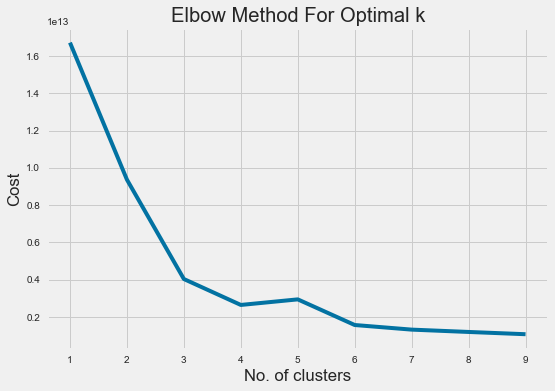

In [34]:
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [35]:
def pca_kprototype_clusters(dataframe, algorithm, args, kwds, categorical_index_col):
    """
    Fonction permettant de générer une projection PCA de clusters

    Entrée :
    - dataframe - unscaled dataframe
    - algorithm - algorithme de clustering
    - args - arguments de l'algorithme, liste
    - kwds - paramètres de l'algorithme, dictionnaire

    Sortie :
    - Aucun (nuage de points 3D interactif)
    """
    start_time = time.time()
    scaler = StandardScaler()
    
    le = LabelEncoder()
    for index_col in categorical_index_col:
        dataframe.iloc[:, index_col] = le.fit_transform(
            dataframe.iloc[:, index_col])
    
    scaled_data = scaler.fit_transform(dataframe)
    labels = algorithm(*args, **kwds).fit_predict(
        scaled_data, categorical=categorical_index_col)
    pca = decomposition.PCA(n_components=2).fit(scaled_data)
    X_projected = pca.transform(scaled_data)
    pca_df = pd.DataFrame(X_projected)
    pca_df['cluster'] = labels
    pca_df.columns = ['x1', 'x2', 'cluster']
    end_time = time.time()
    sns.scatterplot(data=pca_df,
                    x='x1',
                    y='x2',
                    hue='cluster',
                    legend="full",
                    alpha=0.7).set_title('Clusters trouvés par {}'.format(
        str(algorithm.__name__)))
    print(f"Le clustering a pris {round(end_time - start_time)}s")

Le clustering a pris 70s


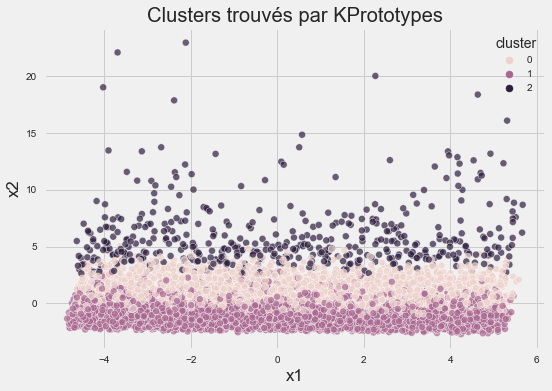

In [36]:
pca_kprototype_clusters(
    olist_data_sample,
    KPrototypes,
    (),
    {'n_clusters': 3, 'init': "random", 'n_init':5},
    categorical_column_index)

Le clustering a pris 51s


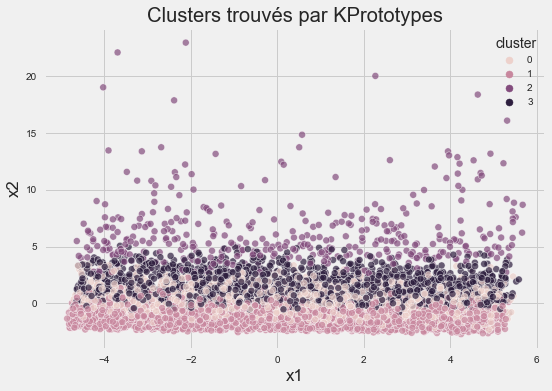

In [37]:
pca_kprototype_clusters(
    olist_data_sample,
    KPrototypes,
    (),
    {'n_clusters': 4, 'init': "random", 'n_init':5},
    categorical_column_index)

Le clustering a pris 68s


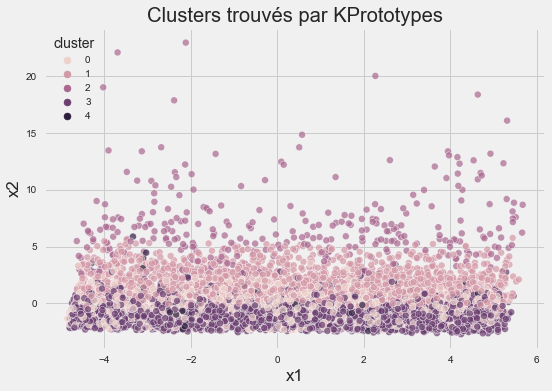

In [38]:
pca_kprototype_clusters(
    olist_data_sample,
    KPrototypes,
    (),
    {'n_clusters': 5, 'init': "random", 'n_init':5},
    categorical_column_index)

Malgré un n_cluster variable, les clusters ne semblent pas se dissocier distinctement. Le KPrototypes pourrait s'avérer ne pas être un choix pertinent pour notre jeu de données.
De plus, le temps d'entraînement est beaucoup plus élevé que le temps d'entraînement avec le KMeans.

Ce résultat peut s'expliquer par le fait lors de l'utilisation du kmeans, la dataframe RFM a été utilisée plutôt que les features brutes du jeu de données.

## DBSCAN

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html


Les points forts des méthodes de clustering basées sur la densité sont les suivants :

- Elles excellent dans l’identification de clusters de formes non sphériques.


- Elles sont résistantes aux valeurs aberrantes.


Les faiblesses des méthodes de clustering basées sur la densité sont les suivantes :

- Elles ne sont pas bien adaptées au clustering dans des espaces à haute dimension.


- Elles ont des difficultés à identifier des clusters de densités variables.

### Visualisation avant tuning

Le clustering a pris 1s


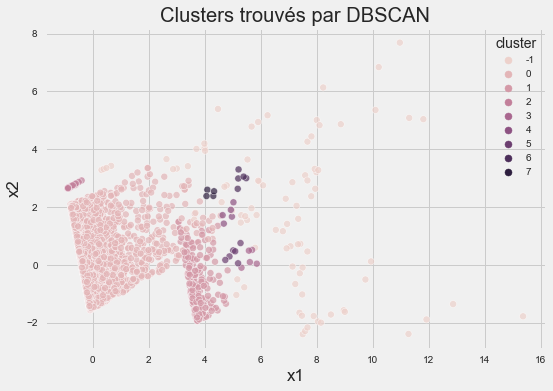

In [39]:
pca_clusters(rfm_with_outliers_sample, cluster.DBSCAN, (), {})

On observe une répartition assez hétérogènes des points de cluster.

### Recherche des meilleurs paramètres

https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc

In [40]:
neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(scaled_samples)
distances, indices = neighbors_fit.kneighbors(scaled_samples)

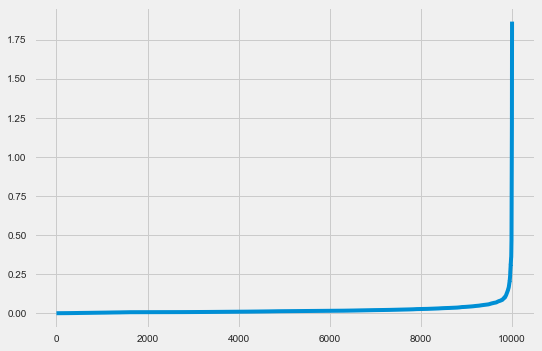

In [41]:
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)

(9900.0, 10000.0)

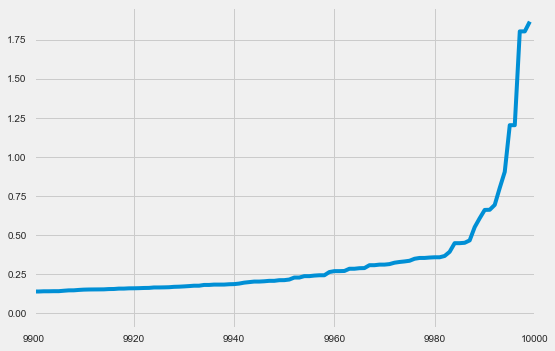

In [42]:
plt.plot(distances)
plt.xlim([9900, 10000])

### Visualisation après tuning

Paramètres de DBSCAN :


- eps : Distance maximale entre deux échantillons pour que l'un soit considéré comme étant dans le voisinage de l'autre.


- min_samples : Le nombre d'échantillons (ou le poids total) dans un voisinage pour qu'un point soit considéré comme un point central. Cela inclut le point lui-même.


- n_jobs : Le nombre de process en parallèles à exécuter. -1 signifie utiliser tous les processeurs.

Le clustering a pris 0s


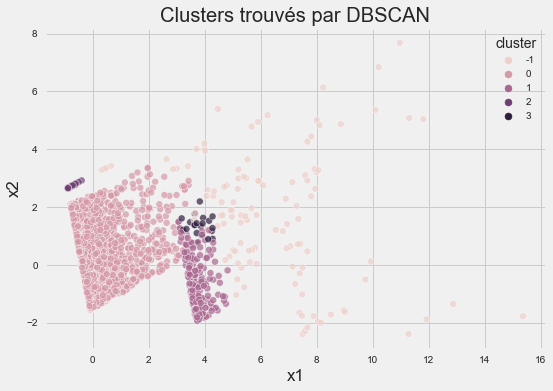

In [43]:
pca_clusters(rfm_with_outliers_sample, cluster.DBSCAN, (), {
    'eps': 0.5,
    'min_samples': 6,
    'n_jobs': -1
})

La répartition des points de cluster est maintenant beaucoup plus homogène qu'avant le changement de paramètre. Néanmoins nous avons vu de meilleurs résultats précédemment avec le KMeans et il est très rapide à entraîner.

En résumé, le kmeans a l'air d'être le bon candidat pour ce projet.